In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [80]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [3]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

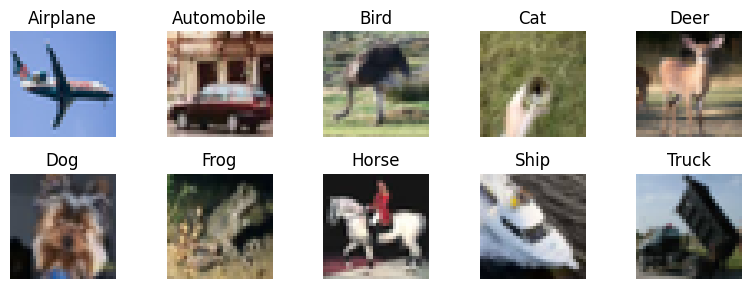

In [4]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [5]:
##################################################
################### YOUR CODES ###################

# normalize colors to 0 to 1
x_train = x_train.astype("float32") / 255.0
x_val   = x_val.astype("float32") / 255.0

# encode by one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val   = to_categorical(y_val, num_classes)

##################################################

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [6]:
##################################################
################### YOUR CODES ###################
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),

    keras.layers.Conv2D(16, kernel_size=3, padding="same"),
    keras.layers.LeakyReLU(0.1),

    keras.layers.Conv2D(32, kernel_size=3, padding="same"),
    keras.layers.LeakyReLU(0.1),

    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(32, kernel_size=3, padding="same"),
    keras.layers.LeakyReLU(0.1),

    keras.layers.Conv2D(64, kernel_size=3, padding="same"),
    keras.layers.LeakyReLU(0.1),

    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256),
    keras.layers.LeakyReLU(0.1),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation="softmax"),
])
##################################################

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [7]:
##################################################
################### YOUR CODES ###################
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [81]:
##################################################
################### YOUR CODES ###################
epochs = 20
batch_size = 64

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)

##################################################

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8166 - loss: 0.5208 - val_accuracy: 0.7779 - val_loss: 0.6516
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8180 - loss: 0.5132 - val_accuracy: 0.7890 - val_loss: 0.6345
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8237 - loss: 0.4935 - val_accuracy: 0.7878 - val_loss: 0.6266
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8289 - loss: 0.4743 - val_accuracy: 0.7938 - val_loss: 0.6140
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8329 - loss: 0.4632 - val_accuracy: 0.7909 - val_loss: 0.6295
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8414 - loss: 0.4475 - val_accuracy: 0.7924 - val_loss: 0.6573
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8459 - loss: 0.4359 - val_accuracy: 0.7922 - val_loss: 0.6655
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8453 - loss: 0.4302 - val_accuracy: 0.

This function plots the `loss` and `accuracy` of your model by the model's history.

In [82]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

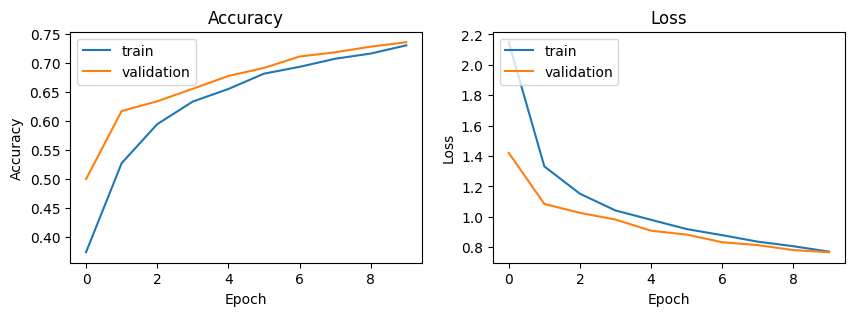

In [19]:
plot_acc_loss(history)

The baseline model has learned well, with no signs of `overfitting` (the train/validation gap is small). However, it’s likely still `undertrained` (not inherent `underfitting`) and could improve with a learning-rate schedule or by increasing the number of epochs/adjusting a few settings.


# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [75]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train_1, y_train_1), (x_val_1, y_val_1) = cifar10.load_data()
x_train_1 = x_train_1.astype("float32") / 255.0
x_val_1  = x_val_1.astype("float32") / 255.0

num_classes = 10
y_train_1 = to_categorical(y_train_1.squeeze(), num_classes)
y_val_1   = to_categorical(y_val_1.squeeze(),   num_classes)
##################################################

print('Training:', x_train_1.shape, y_train_1.shape)
print('Validation:', x_val_1.shape, y_val_1.shape)

Training: (50000, 32, 32, 3) (50000, 10)
Validation: (10000, 32, 32, 3) (10000, 10)


In [76]:
##################################################
################### YOUR CODES ###################

# use flipping , rotation and add noise to the preprocessing
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.GaussianNoise(0.02),
    ],
    name="data_augmentation"
)

my_model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        data_augmentation,

        keras.layers.Conv2D(16, kernel_size=3, padding="same"),
        keras.layers.LeakyReLU(0.1),

        keras.layers.Conv2D(32, kernel_size=3, padding="same"),
        keras.layers.LeakyReLU(0.1),

        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Dropout(0.25),

        keras.layers.Conv2D(32, kernel_size=3, padding="same"),
        keras.layers.LeakyReLU(0.1),

        keras.layers.Conv2D(64, kernel_size=3, padding="same"),
        keras.layers.LeakyReLU(0.1),

        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Dropout(0.25),

        keras.layers.Flatten(),
        keras.layers.Dense(256),
        keras.layers.LeakyReLU(0.1),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(10, activation="softmax"),
    ],
)


my_model.summary()

##################################################

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
##################################################
################### YOUR CODES ###################
my_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
##################################################

In [84]:
##################################################
################### YOUR CODES ###################
# train the model

history = my_model.fit(
    x_train_1, y_train_1,
    validation_data=(x_val_1, y_val_1),
    epochs=20,
    batch_size=64,
    verbose=1
)

##################################################


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7248 - loss: 0.7841 - val_accuracy: 0.7686 - val_loss: 0.6858
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7382 - loss: 0.7544 - val_accuracy: 0.7562 - val_loss: 0.7095
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7360 - loss: 0.7428 - val_accuracy: 0.7743 - val_loss: 0.6721
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7463 - loss: 0.7301 - val_accuracy: 0.7888 - val_loss: 0.6326
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7429 - loss: 0.7300 - val_accuracy: 0.7843 - val_loss: 0.6357
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7497 - loss: 0.7197 - val_accuracy: 0.7890 - val_loss: 0.6086
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7576 - loss: 0.6954 - val_accuracy: 0.7890 - val_loss: 0.6104
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7546 - loss: 0.6994 - v

Let's see your model performance with augmentation.

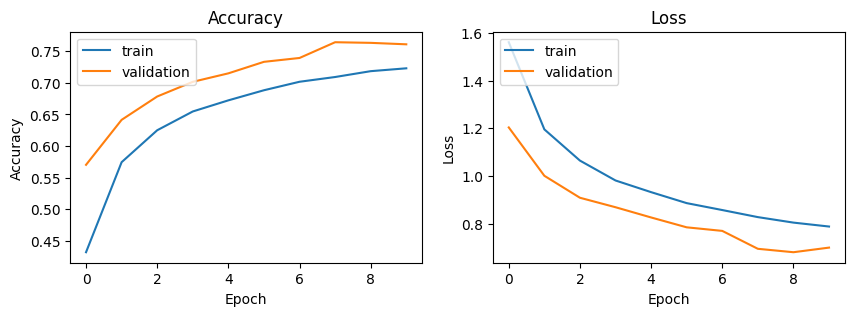

In [79]:
plot_acc_loss(history)

With augmentation, the `train/val` gap flipped (−3.0pp) and validation loss improved from 0.6420 to 0.5840, indicating less `overfitting` and better `generalization`. The model is still a bit `undertrained`; with more epochs and an LR schedule or slightly milder augmentation it should improve further.